# Session 24

## Linear Regression and correlation.

> y = mx + c will be written as y = beta_0 + beta_1(x)

## RMSE- Root Mean Squared Error

#### Used when the individual errors are bigger but the average error is 0

> Finding the error

> Square the error

> Find the mean

> Apply Square root on the mean


#### The Model whose RMSE will be smaller will be the best model

### New Equation with the RMSE

> y = beta_0 + beta_1(x) + Eplison

### The Line of our interest is:

> Sunday = beta_0 + beta_1 Daily + Epsilon

> or 

> Y = beta_0 + beta_1 X + Epsilon

> beta_1_cap = (E(yi - y_bar)(xi - x_bar)) / (E(xi - x_bar)^2)


> beta_0_cap = y_bar = beta_1_cap(x_bar)

#### Where E is the summation

#### Coefficient of Determination R^2

> Proportion of variation in Y "Explained" by the regression on X

>> r^2 = explained variation/total variation = SSR/SST

> Range of r^2    0 <= r^2 <= 1

> better only if r^2 > .8

## Linear regression in python

# Import Data Set

In [1]:
import pandas as pd
data = pd.read_csv("Session24_data/NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [3]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/home/aladdin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

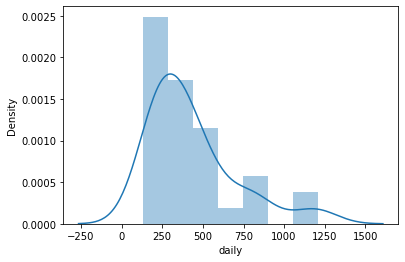

In [4]:
import seaborn as sns
sns.distplot(data['daily'])

/home/aladdin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

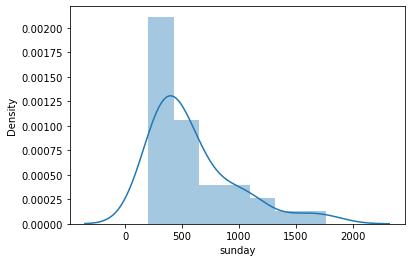

In [5]:
sns.distplot(data['sunday'])

Fitting a Linear Regression Model

In [6]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

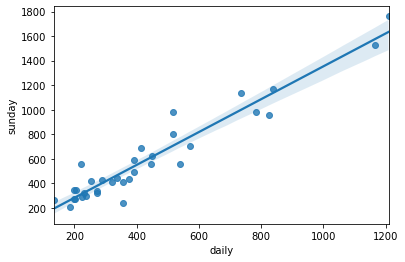

In [7]:
sns.regplot(x="daily", y="sunday", data=data);

In [8]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [9]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [10]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

# Predict for new data point

In [11]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([272.28])

In [12]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [13]:
model.predict(data_pred)

0    378.613164
dtype: float64

In [14]:
1.33*272.28 + 13.83

375.96239999999995

## Manual Calculation of RMSE

In [15]:
wc_at = pd.read_csv("Session24_data/WC_AT.csv")

In [16]:
wc_at

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [17]:
wc_at.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [18]:
model2 = smf.ols("AT~Waist", data = wc_at).fit()

In [19]:
model2.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [20]:
print(model2.tvalues)
print(model2.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64
Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           6.02e-19
Time:                        00:28:56   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
print(model2.rsquared)

print(model2.rsquared_adj)

0.6700368930528429
0.6669531256981966


In [22]:
(model2.rsquared, model2.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

In [23]:
data_series = wc_at["Waist"]

In [24]:
data_series

0       74.75
1       72.60
2       81.80
3       83.95
4       74.65
        ...  
104    100.10
105     93.30
106    101.80
107    107.90
108    108.50
Name: Waist, Length: 109, dtype: float64

In [25]:
data_pred2=pd.DataFrame(data_series,columns=["Waist"])

In [26]:
predicted_data = model2.predict(data_series)

In [27]:
predicted_data

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [28]:
from sklearn.metrics import mean_squared_error as mse

In [29]:
mse_value = mse(wc_at["AT"], predicted_data)

### Rmse value

In [36]:
import math

rmse_value = round(math.sqrt(mse_value), 2)
print(rmse_value)

32.76


In [5]:
import pandas as pd
data = pd.read_csv("Session24_data/NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [3]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/home/aladdin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

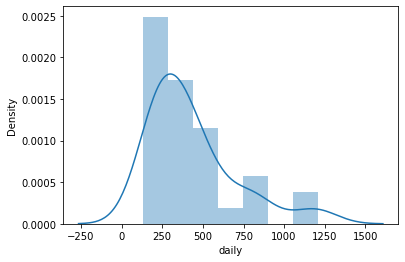

In [4]:
sns.distplot(data['daily'])

<AxesSubplot:xlabel='sunday'>

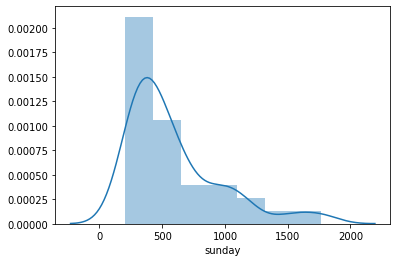

In [58]:
sns.distplot(data['sunday'])

Fitting a Linear Regression Model

In [40]:
model = smf.ols("sunday~daily",data = data).fit()

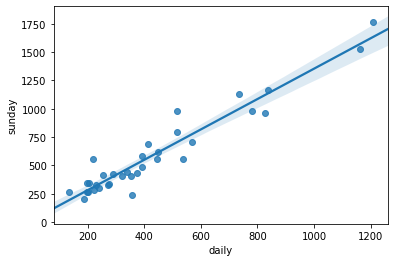

In [59]:
sns.regplot(x="daily", y="sunday", data=data);

In [5]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [34]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept     0.386427
daily        18.934840
dtype: float64 
   Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [43]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

# Predict for new data point

In [48]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [49]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [50]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64